# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [3]:
df=pd.read_excel('C:/Users/aksin52/Documents/1. Learnbay Machine Learning Projects/bank-additional/bank_telemarketing.xlsx')

In [4]:
df.shape

(41188, 21)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [79]:
df.dtypes

age                          int64
job                         object
marital                     object
education                   object
default                     object
housing                     object
loan                        object
contact                     object
month                       object
day_of_week                 object
duration                     int64
campaign                     int64
pdays                        int64
previous                     int64
poutcome                    object
emp.var.rate               float64
cons.price.idx             float64
cons.conf.idx              float64
euribor3m                  float64
nr.employed                float64
target                       int32
pdays_rank                    int8
pred_prob_logreg           float64
P_Rank_logreg                 int8
pred_prob_dtree            float64
P_Rank_tree                   int8
pred_prob_rf               float64
P_Rank_rf                     int8
pred_prob_gbm       

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Label the Target feature to 1/0

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
df['target']=np.where(df['y']=="yes",1,0)

# Drop the Target feature to retain only Target 

In [12]:
df=df.drop(['y'],axis=1)

# Defining Target and Independent Features

In [13]:
Y=df[['target']]

X=df.drop(['target'],axis=1)

# Get the Event Rate

In [14]:
Y.mean()

target    0.112654
dtype: float64

# Split features into Numerical and Categorical

In [15]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [17]:
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [19]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [21]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [22]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [23]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [24]:
char=pd.concat([char,cat],axis=1,join="inner")

In [25]:
char.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [26]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


# Outlier Analysis of Numerical Features

In [27]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Capping and Flooring of outliers

In [28]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [29]:
num=num.apply(lambda x : outlier_cap(x))

In [30]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Missing Value Analysis

In [31]:
num.isnull().mean()

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
dtype: float64

In [ ]:
# Since the data does not contain any missing values Imputation Processes are not required
# In case there are missing values in the data, then please remove those columns or features that have more than 25% of rows as missing
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [32]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [33]:
num_1.iloc[0]

age                56.000
duration          261.000
campaign            1.000
pdays             999.000
cons.price.idx     93.994
cons.conf.idx     -36.400
euribor3m           4.857
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,0.0,6.0,6.0,5.0
2,4.0,6.0,0.0,0.0,6.0,6.0,5.0
3,5.0,4.0,0.0,0.0,6.0,6.0,5.0
4,9.0,7.0,0.0,0.0,6.0,6.0,5.0


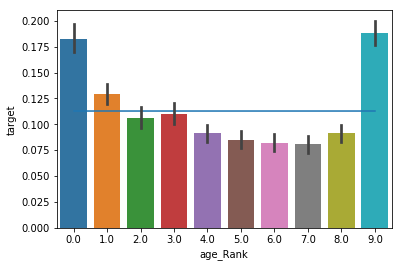

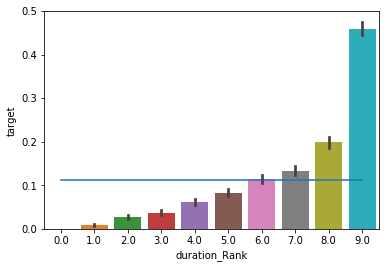

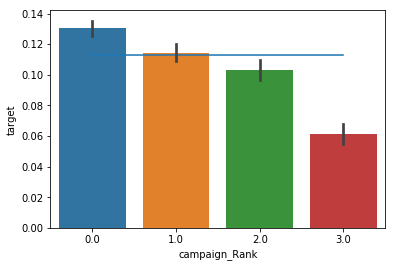

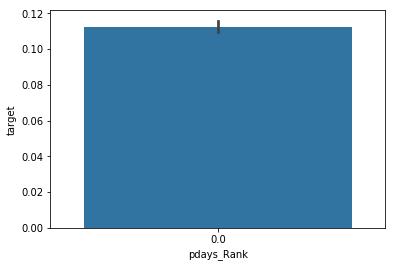

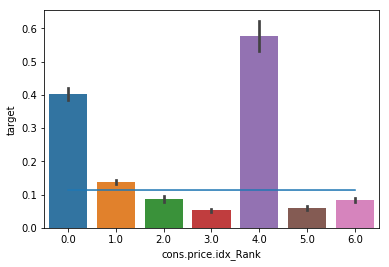

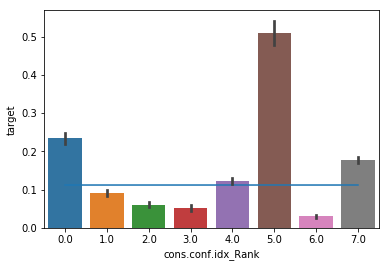

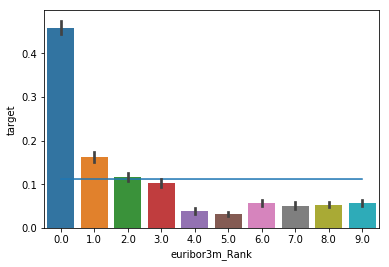

In [35]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [37]:
#df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
#from numpy import mean
#ax = sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)

In [38]:
num_1=num_1.drop(['age','pdays'],axis=1)

In [39]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [40]:
select_features_df_num.shape

(41188, 5)

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

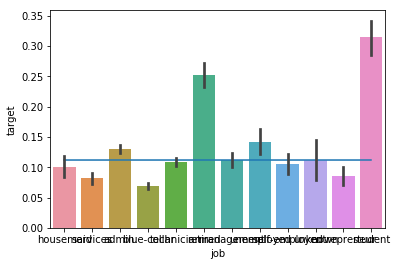

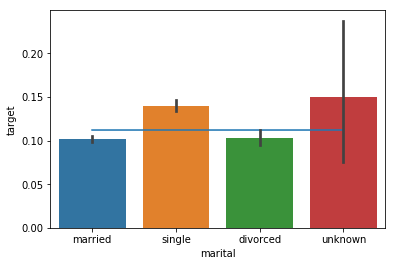

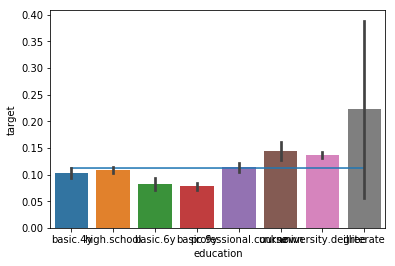

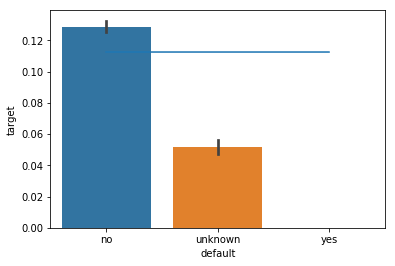

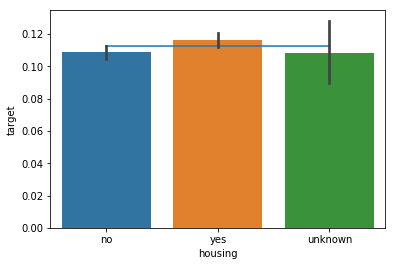

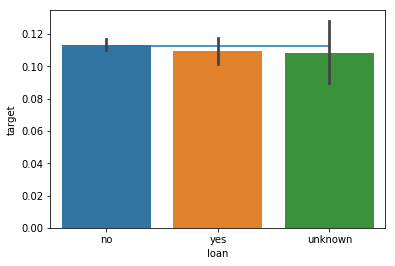

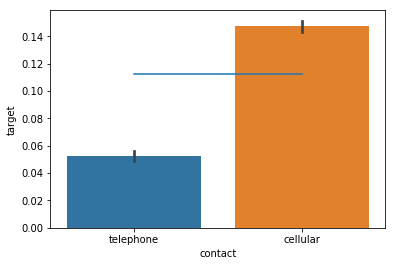

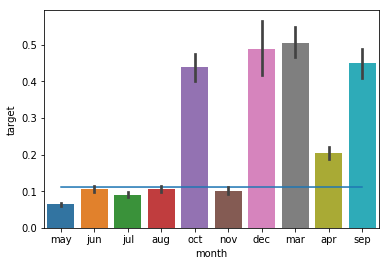

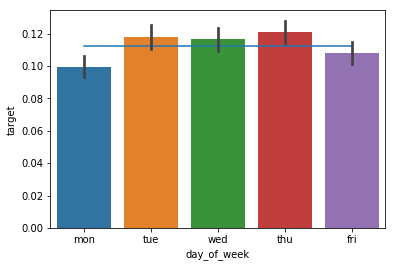

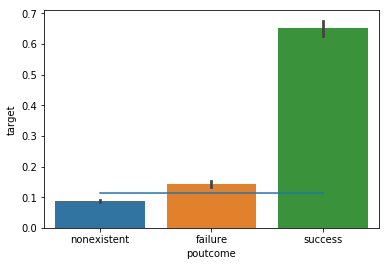

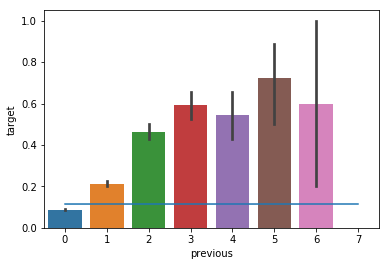

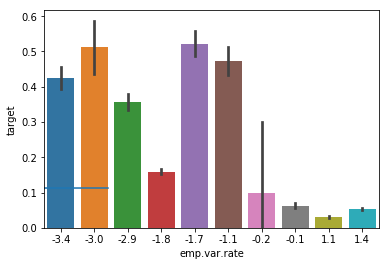

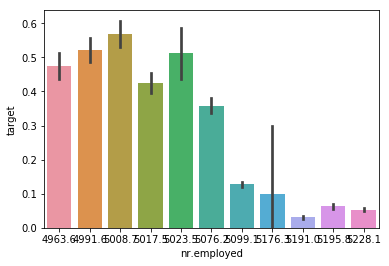

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [42]:
char=char.drop(['housing','education','marital','loan','day_of_week'],axis=1)

In [43]:
char['default']=np.where(char['default'] =='unknown', 'yes', char['default'])
#char['previous_ind']=np.where(char['previous'] >0, 1, 0) (try  this option to see the impact on the model)
#char=char.drop(['previous'],drop=1)

In [44]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(41188, 27)

# Part 2 - Select K Best

# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [46]:
select_features_df_char=X_char_dum

# Creating the Master Feature Set for Model Development

In [47]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [48]:
X_all.shape

(41188, 32)

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [50]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 32)
Shape of Testing Data (12357, 32)
Response Rate in Training Data target    0.111616
dtype: float64
Response Rate in Testing Data target    0.115076
dtype: float64


# Model Building Step

In [51]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [52]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,previous,0.181651
1,emp.var.rate,-0.177846
2,nr.employed,-0.009273
3,job_blue-collar,-0.231303
4,job_entrepreneur,-0.006089
5,job_housemaid,0.004024
6,job_management,-0.019891
7,job_retired,0.101390
8,job_self-employed,-0.012607
9,job_services,-0.106029


In [53]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [54]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=500, random_state=0)

In [ ]:
!pip install pydotplus

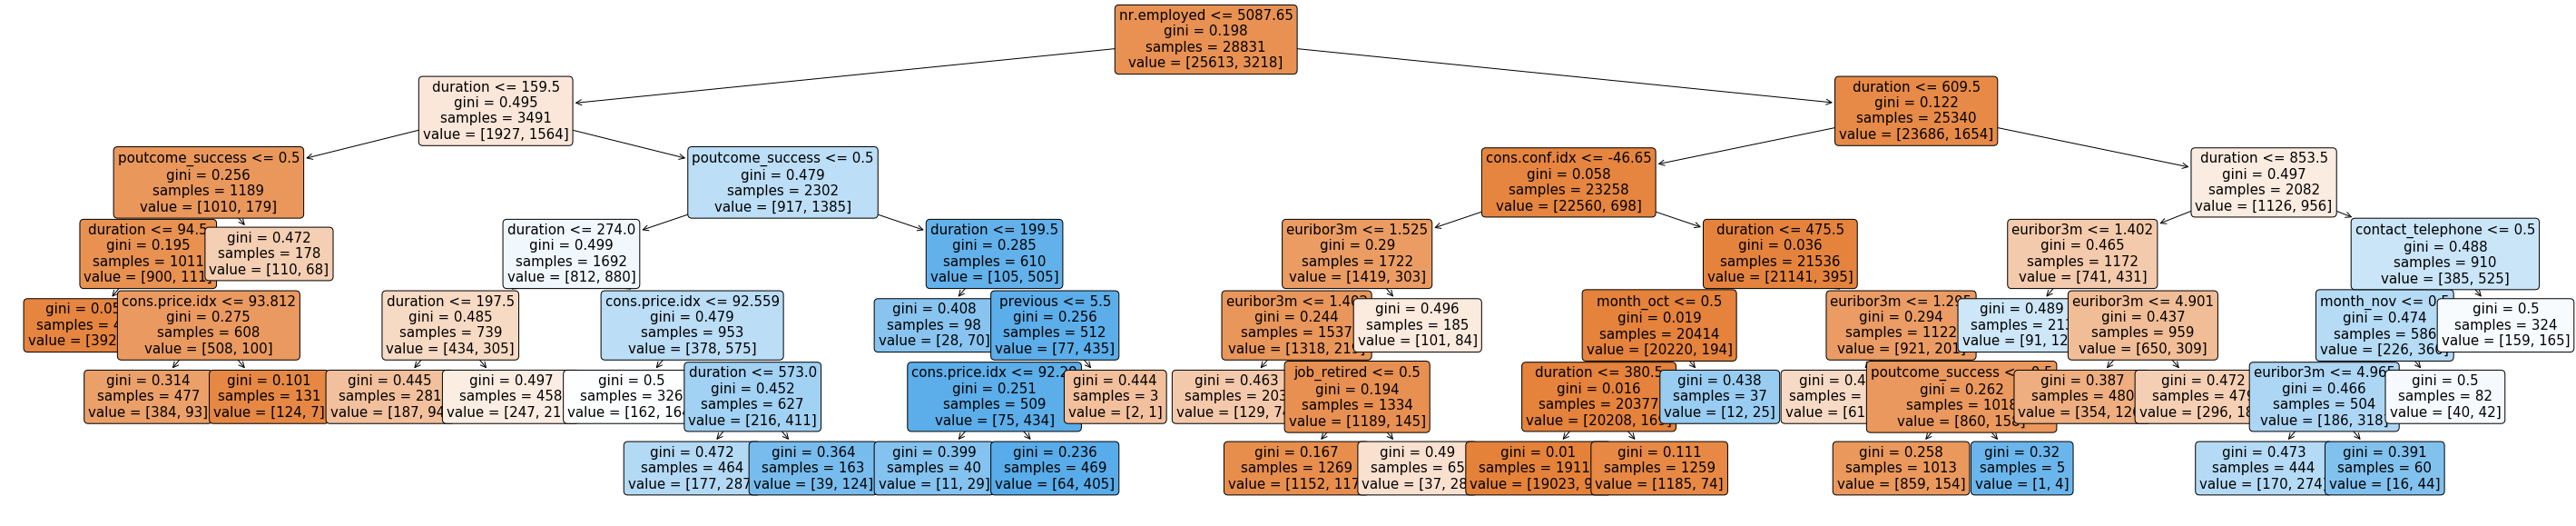

In [55]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [56]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=500, random_state=0)

In [57]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.300048
nr.employed,0.202064
euribor3m,0.150076
poutcome_success,0.104130
emp.var.rate,0.063241
cons.conf.idx,0.048608
cons.price.idx,0.040654
previous,0.020427
poutcome_nonexistent,0.012199
contact_telephone,0.011899


In [58]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=500,
                           random_state=0)

In [59]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.458785
nr.employed,0.307280
euribor3m,0.084554
poutcome_success,0.043614
cons.conf.idx,0.033919
month_oct,0.013010
campaign,0.007605
cons.price.idx,0.006704
contact_telephone,0.006633
month_mar,0.006267


base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500))  
                       ] 

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

clf.fit(X_train, y_train)

In [60]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
#y_pred_stacking=clf.predict(X_test)

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [62]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.9060451565914057
Precision 0.6458100558659218
Recall 0.40646976090014064
f1_score 0.4989210185584808


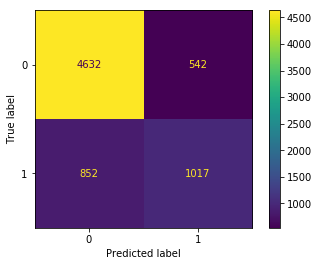

In [58]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [63]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9122764425022255
Precision 0.6467013888888888
Recall 0.5239099859353024
f1_score 0.5788655788655788


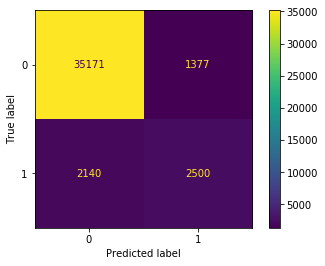

In [64]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [65]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8993283159342883
Precision 0.7247474747474747
Recall 0.20182841068917018
f1_score 0.31573157315731576


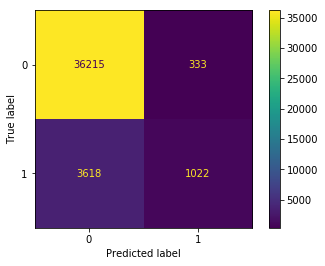

In [66]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9147042162337137
Precision 0.6628318584070797
Recall 0.5267229254571026
f1_score 0.5869905956112853


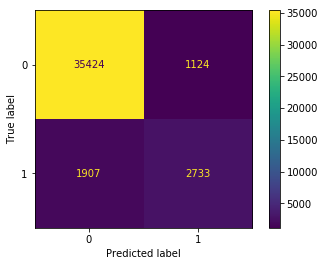

In [68]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [ ]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

In [69]:
# Logistic Regression - Gains Chart

In [70]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.603302,0.639267,2485.0,2485.0,0.535560,0.535560,1634.0,1634.0,0.044708,0.044708,0.4909,0.100005,0.100005,1
1,9,4119,0.307113,0.240583,1265.0,3750.0,0.272629,0.808190,2854.0,4488.0,0.078089,0.122797,0.6854,0.100005,0.200010,2
2,8,4119,0.144453,0.098078,595.0,4345.0,0.128233,0.936422,3524.0,8012.0,0.096421,0.219219,0.7172,0.100005,0.300015,3
3,7,4118,0.044439,0.049319,183.0,4528.0,0.039440,0.975862,3935.0,11947.0,0.107667,0.326885,0.6490,0.099981,0.399995,4
4,6,4119,0.014324,0.029819,59.0,4587.0,0.012716,0.988578,4060.0,16007.0,0.111087,0.437972,0.5506,0.100005,0.500000,5
5,5,4119,0.007283,0.020132,30.0,4617.0,0.006466,0.995043,4089.0,20096.0,0.111880,0.549852,0.4452,0.100005,0.600005,6
6,4,4118,0.003157,0.015027,13.0,4630.0,0.002802,0.997845,4105.0,24201.0,0.112318,0.662170,0.3357,0.099981,0.699985,7
7,3,4119,0.001942,0.011589,8.0,4638.0,0.001724,0.999569,4111.0,28312.0,0.112482,0.774653,0.2249,0.100005,0.799990,8
8,2,4119,0.000486,0.008661,2.0,4640.0,0.000431,1.000000,4117.0,32429.0,0.112646,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.004499,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,-0.0000,0.100005,1.000000,10


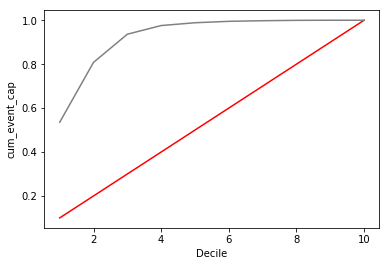

In [71]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [72]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.633892,0.633333,2611.0,2611.0,0.562716,0.562716,1508.0,1508.0,0.041261,0.041261,0.5215,0.100005,0.100005,1
1,9,4119,0.328721,0.327221,1354.0,3965.0,0.291810,0.854526,2765.0,4273.0,0.075654,0.116915,0.7376,0.100005,0.200010,2
2,8,4119,0.114834,0.101137,473.0,4438.0,0.101940,0.956466,3646.0,7919.0,0.099759,0.216674,0.7398,0.100005,0.300015,3
3,7,4118,0.028898,0.020242,119.0,4557.0,0.025647,0.982112,3999.0,11918.0,0.109418,0.326092,0.6560,0.099981,0.399995,4
4,6,4119,0.009468,0.004969,39.0,4596.0,0.008405,0.990517,4080.0,15998.0,0.111634,0.437726,0.5528,0.100005,0.500000,5
5,5,4119,0.006069,0.004969,25.0,4621.0,0.005388,0.995905,4094.0,20092.0,0.112017,0.549743,0.4462,0.100005,0.600005,6
6,4,4118,0.002428,0.004969,10.0,4631.0,0.002155,0.998060,4108.0,24200.0,0.112400,0.662143,0.3359,0.099981,0.699985,7
7,3,4119,0.001457,0.004969,6.0,4637.0,0.001293,0.999353,4113.0,28313.0,0.112537,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000486,0.004969,2.0,4639.0,0.000431,0.999784,4117.0,32430.0,0.112646,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.004969,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


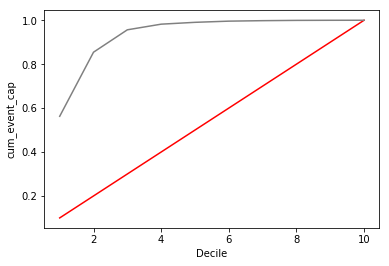

In [73]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Random Forest Lorenz Curve

In [74]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.572469,0.474488,2358.0,2358.0,0.508190,0.508190,1761.0,1761.0,0.048183,0.048183,0.4600,0.100005,0.100005,1
1,9,4119,0.350813,0.285180,1445.0,3803.0,0.311422,0.819612,2674.0,4435.0,0.073164,0.121347,0.6983,0.100005,0.200010,2
2,8,4119,0.150279,0.134068,619.0,4422.0,0.133405,0.953017,3500.0,7935.0,0.095764,0.217112,0.7359,0.100005,0.300015,3
3,7,4118,0.018213,0.063664,75.0,4497.0,0.016164,0.969181,4043.0,11978.0,0.110622,0.327733,0.6414,0.099981,0.399995,4
4,6,4119,0.019908,0.035996,82.0,4579.0,0.017672,0.986853,4037.0,16015.0,0.110457,0.438191,0.5487,0.100005,0.500000,5
5,5,4119,0.005341,0.030750,22.0,4601.0,0.004741,0.991595,4097.0,20112.0,0.112099,0.550290,0.4413,0.100005,0.600005,6
6,4,4118,0.004614,0.028121,19.0,4620.0,0.004095,0.995690,4099.0,24211.0,0.112154,0.662444,0.3332,0.099981,0.699985,7
7,3,4119,0.002913,0.024613,12.0,4632.0,0.002586,0.998276,4107.0,28318.0,0.112373,0.774817,0.2235,0.100005,0.799990,8
8,2,4119,0.001457,0.019869,6.0,4638.0,0.001293,0.999569,4113.0,32431.0,0.112537,0.887354,0.1122,0.100005,0.899995,9
9,1,4119,0.000486,0.017724,2.0,4640.0,0.000431,1.000000,4117.0,36548.0,0.112646,1.000000,0.0000,0.100005,1.000000,10


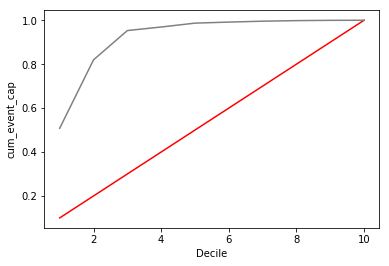

In [75]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [76]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.694101,0.671075,2859.0,2859.0,0.616164,0.616164,1260.0,1260.0,0.034475,0.034475,0.5817,0.100005,0.100005,1
1,9,4119,0.310998,0.311226,1281.0,4140.0,0.276078,0.892241,2838.0,4098.0,0.077651,0.112127,0.7801,0.100005,0.200010,2
2,8,4119,0.096625,0.088803,398.0,4538.0,0.085776,0.978017,3721.0,7819.0,0.101811,0.213938,0.7641,0.100005,0.300015,3
3,7,4118,0.020155,0.019547,83.0,4621.0,0.017888,0.995905,4035.0,11854.0,0.110403,0.324341,0.6716,0.099981,0.399995,4
4,6,4119,0.003156,0.007389,13.0,4634.0,0.002802,0.998707,4106.0,15960.0,0.112345,0.436686,0.5620,0.100005,0.500000,5
5,5,4119,0.001214,0.004121,5.0,4639.0,0.001078,0.999784,4114.0,20074.0,0.112564,0.549250,0.4505,0.100005,0.600005,6
6,4,4118,0.000000,0.002805,0.0,4639.0,0.000000,0.999784,4118.0,24192.0,0.112674,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002358,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.001984,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001290,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


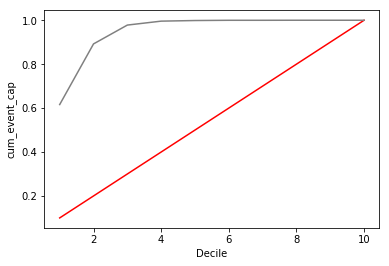

In [77]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with retention offers in Telecom

In [78]:
df['Predicted_Response_Rank']=np.where(df['P_Rank_GBM']>8,"Top 2","Bottom 8")

In [86]:
df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 8,0.015175
Top 2,0.502549


In [80]:
df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [81]:
df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


In [82]:
df['duration'].mean()

258.2850101971448

In [83]:
df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

In [85]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6517,5840
Low Duration,26433,2398


In [ ]:
###### Recommendations ##########
# Phase 1 - Speak to customers who falls in top 2 predicted ranks(deciles) and also are in High Duration segment
# Similarly - Phase 2 ( Top 2 , Low Duration)
# Phase 3 - Bottom 7 and High Duration (randomly select 25% of them only)